**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
!pip install yellowbrick scikit-learn --quiet

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pickle
with open('train.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [ ]:
modelo = DecisionTreeClassifier(criterion='entropy',max_depth=3)
Y = modelo.fit(X_treino, y_treino)



> **Vamos testar o modelo?**



In [ ]:
previsoes = modelo.predict(X_teste)

In [ ]:
previsoes



> **Será se o modelo acertou?**



In [ ]:
y_teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste,previsoes)

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

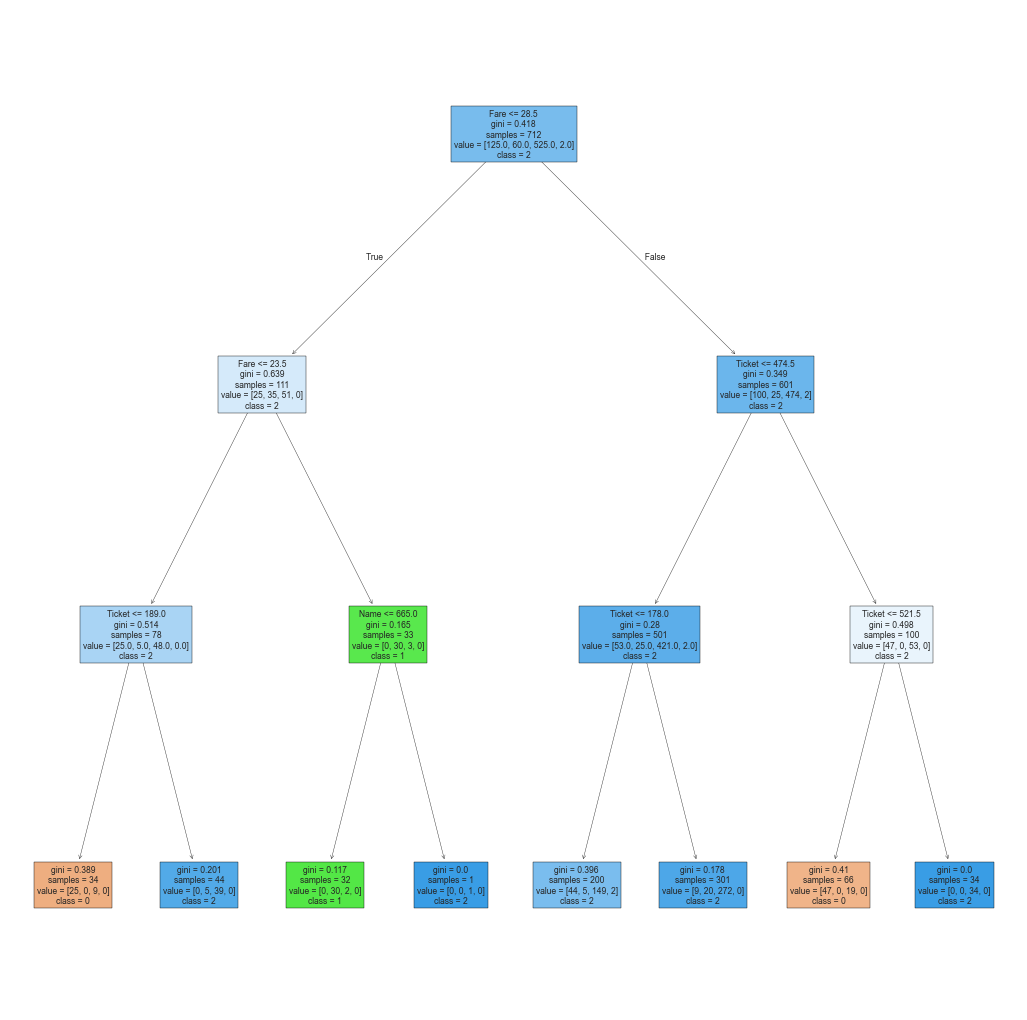

In [41]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Suponha que X_treino e y_treino contenham "sim" e "não"
label_encoder = LabelEncoder()

# Converter as colunas categóricas para valores numéricos
X_treino_encoded = X_treino.copy()
for coluna in X_treino_encoded.columns:
    X_treino_encoded[coluna] = label_encoder.fit_transform(X_treino_encoded[coluna])

# Converter y_treino caso também tenha valores "sim"/"não"
y_treino_encoded = label_encoder.fit_transform(y_treino)

# Criar e treinar o modelo com profundidade máxima = 3
modelo = tree.DecisionTreeClassifier(max_depth=3)
modelo.fit(X_treino_encoded, y_treino_encoded)

# Gerar a árvore de decisão
previsores = X_treino.columns  # Nome original das colunas
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))

# Convertendo classes para string
class_names_str = [str(c) for c in modelo.classes_]

tree.plot_tree(modelo, feature_names=previsores, class_names=class_names_str, filled=True)
plt.show()